In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn as sk
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras

from tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Conv2D, MaxPooling2D

tf.__version__

'2.3.1'

In [2]:
datagen = ImageDataGenerator(rescale=1./255)
###########################################################################################
train_generator = datagen.flow_from_directory('intel_image/seg_train')
val_generator = datagen.flow_from_directory('intel_image/seg_test', target_size=(150, 150))
###########################################################################################
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)
###########################################################################################
train_generator = datagen.flow_from_directory('intel_image/seg_train', target_size=(150, 150), subset='training', class_mode='binary')
test_generator = datagen.flow_from_directory('intel_image/seg_train', target_size=(150, 150), subset='validation', class_mode='binary')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


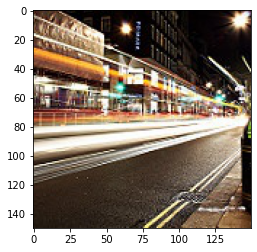

In [3]:
plt.imshow(train_generator[0][0][0])

In [5]:
print(train_generator[0][0][0].shape)
print(test_generator[0][0][0].shape)
print(val_generator[0][0][0].shape)
print(train_generator[0][0][0].dtype)
print(test_generator[0][0][0].dtype)
print(val_generator[0][0][0].dtype)

(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
float32
float32
float32


In [6]:
train_generator[0][0][0]=train_generator[0][0][0].reshape(-1,150,150,3)

In [14]:
model = keras.models.Sequential([

                    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',input_shape=(150,150,3)),
                    layers.MaxPooling2D((2, 2)),               

                    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), 
                    layers.MaxPooling2D((2, 2)),

                    layers.Flatten(),

                    layers.Dense(200,activation="relu"),
                    layers.Dense(180,activation="relu"),
                    layers.Dense(100,activation="relu"),
                    layers.Dense(50,activation="relu"),
                    layers.Dense(10,activation="softmax")
])

In [15]:
#compile model
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [16]:
#fit model
model.fit(train_generator,epochs=5)

Epoch 1/5
351/351 [==============================] - 209s 595ms/step - loss: 1.0803 - accuracy: 0.5857
Epoch 2/5
351/351 [==============================] - 201s 573ms/step - loss: 0.6884 - accuracy: 0.7459
Epoch 3/5
351/351 [==============================] - 186s 530ms/step - loss: 0.4928 - accuracy: 0.8244
Epoch 4/5
351/351 [==============================] - 178s 507ms/step - loss: 0.2740 - accuracy: 0.9034
Epoch 5/5
351/351 [==============================] - 173s 494ms/step - loss: 0.1590 - accuracy: 0.9481
